| **Inicio** | **atrás 11** | **Siguiente 13** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./11_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./13_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|

# **12. Matemáticas para el aprendizaje automático: PCA**

## **12.1 Estadísticas de los conjuntos de datos**

El análisis de componentes principales (ACP) es uno de los algoritmos de reducción de la dimensionalidad más importantes en el aprendizaje automático. En este curso, sentamos las bases matemáticas para derivar y comprender el ACP desde un punto de vista geométrico. En este módulo, aprendemos a resumir conjuntos de datos (por ejemplo, imágenes) utilizando estadísticas básicas, como la media y la varianza. También estudiamos las propiedades de la media y la varianza cuando desplazamos o escalamos el conjunto de datos original. Proporcionaremos la intuición matemática así como las habilidades para derivar los resultados. También implementaremos nuestros resultados en código (cuadernos jupyter), lo que nos permitirá practicar nuestra comprensión matemática para calcular medias de conjuntos de datos de imágenes. Por lo tanto, serán necesarios algunos conocimientos previos de python/numpy para superar este curso. Nota: Si ha realizado los otros dos cursos de esta especialización, éste será más difícil (sobre todo debido a las tareas de programación). Sin embargo, si supera la primera semana de este curso, superará el curso completo con una alta probabilidad.

### **12.1.1 Introducción**

El término **"Estadísticas de los conjuntos de datos"** se refiere al análisis estadístico aplicado a una colección de datos para describir y resumir sus características con medidas numéricas. Este análisis puede incluir un amplio rango de métodos estadísticos, desde descriptivos básicos hasta modelos inferenciales más complejos.

**Estadísticas Descriptivas Básicas**

Para entender cualquier conjunto de datos, usualmente comenzamos con estadísticas descriptivas que nos proporcionan información sobre la tendencia central, la dispersión y la forma de la distribución de los datos. Aquí están algunas de las estadísticas descriptivas más comunes:

**Media (Promedio)**: El valor promedio de un conjunto de números, calculado como la suma de todos los valores dividida entre el número de valores.

   $\text{Media} = \frac{\sum_{i=1}^n x_i}{n}$

**Mediana**: El valor medio en un conjunto de datos ordenados. Si el número de observaciones es impar, es el valor central. Si es par, es el promedio de los dos valores centrales.

**Modo**: El valor o valores que aparecen con mayor frecuencia en un conjunto de datos.

**Desviación Estándar**: Una medida de la cantidad de variación o dispersión de un conjunto de valores.

   $\text{Desviación Estándar} = \sqrt{\frac{\sum_{i=1}^n (x_i - \text{Media})^2}{n-1}}$


**Varianza**: El cuadrado de la desviación estándar.

**Cuartiles**: Valores que dividen el conjunto de datos en cuatro partes iguales. Los cuartiles incluyen el primer cuartil (25%), el segundo cuartil o mediana (50%), y el tercer cuartil (75%).

**Rango Intercuartílico (IQR)**: Diferencia entre el tercer cuartil y el primer cuartil, una medida de dispersión estadística que es resistente a los valores extremos.

**Ejemplo Práctico: Análisis de Calificaciones**

Supongamos que tenemos un conjunto de datos que representa las calificaciones de estudiantes en un examen.

**Datos de Ejemplo**

`edades = [22, 20, 25, 27, 21, 23, 27, 24, 20, 25]`

**Código Python para el Análisis de Estadísticas Descriptivas**

Vamos a calcular estas estadísticas utilizando Python:

Media: 23.4
Mediana: 23.5
Moda: 20
Varianza: 6.239999999999999
Desviación Estándar: 2.4979991993593593
Rango: 7


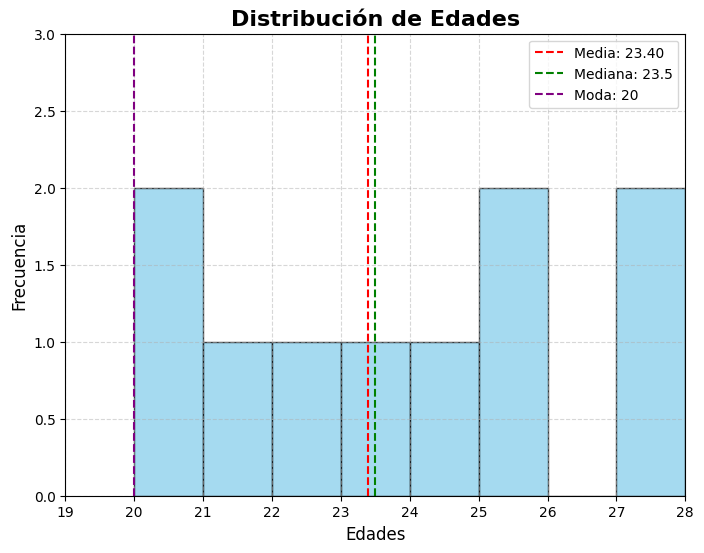

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
edades = np.array([22, 20, 25, 27, 21, 23, 27, 24, 20, 25])

# Cálculos estadísticos
media = np.mean(edades)
mediana = np.median(edades)
moda = np.bincount(edades).argmax()
varianza = np.var(edades)
desviacion_std = np.std(edades)
rango = np.ptp(edades)

# Mostrar resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Varianza:", varianza)
print("Desviación Estándar:", desviacion_std)
print("Rango:", rango)

# Configuración de la gráfica de histograma
plt.figure(figsize=(8, 6))  # Tamaño de la gráfica
plt.hist(edades, bins=range(min(edades), max(edades) + 2), color='skyblue', edgecolor='black', alpha=0.75)
plt.title("Distribución de Edades", fontsize=16, fontweight='bold')
plt.xlabel("Edades", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {mediana}')
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=1.5, label=f'Moda: {moda}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Estilo de cuadrícula suave
plt.xlim([min(edades) - 1, max(edades) + 1])  # Ajustar límites para incluir todo el rango
plt.ylim([0, max(np.bincount(edades)) + 1])  # Ajustar límites en el eje Y
plt.show()

**Visualización**

El código anterior también incluye una visualización básica usando un diagrama de caja (boxplot), que muestra la mediana, los cuartiles, y los posibles valores atípicos, proporcionando una representación gráfica de la distribución de las calificaciones.

**Conclusión**

Las estadísticas de los conjuntos de datos son fundamentales para cualquier análisis de datos, ya que proporcionan una primera mirada a la información y pueden indicar qué técnicas adicionales podrían ser necesarias para un análisis más profundo. Estas medidas descriptivas son solo el comienzo; análisis más complejos pueden incluir pruebas de hipótesis, regresión, y otras técnicas inferenciales para hacer predicciones o entender las relaciones entre variables.

### **12.1.2 Media de un conjunto de datos**

**Definición de Media**

La **media**, también conocida como el promedio, es una medida de tendencia central que intenta describir un conjunto de datos proporcionando un valor central para todos los datos. Es una de las estadísticas descriptivas más comunes y útiles en el análisis de datos.

**Fórmula Matemática**

La media se calcula sumando todos los valores en un conjunto de datos y luego dividiendo esa suma por el número total de valores. Matemáticamente, se expresa como:

$\text{Media} = \mu = \frac{\sum_{i=1}^{n} x_i}{n}$

donde $(x_i)$ representa cada valor en el conjunto de datos y $(n)$ es el número total de valores.

**Ejemplo**

Supongamos que tenemos las siguientes puntuaciones de un examen:

$\text{Puntuaciones} = [80, 92, 78, 85, 90, 88, 70, 95]$

Para calcular la media de estas puntuaciones, sumamos todos los valores y luego dividimos por el número total de puntuaciones.

$\text{Suma de puntuaciones} = 80 + 92 + 78 + 85 + 90 + 88 + 70 + 95 = 678$

$\text{Número de puntuaciones} = 8$

$\text{Media} = \frac{678}{8} = 84.75$

**Código en Python y Gráfica**

Ahora, vamos a calcular la media utilizando Python y a visualizarla en un gráfico para entender mejor cómo se distribuyen los datos en relación a la media.

La media de las puntuaciones es: 84.75


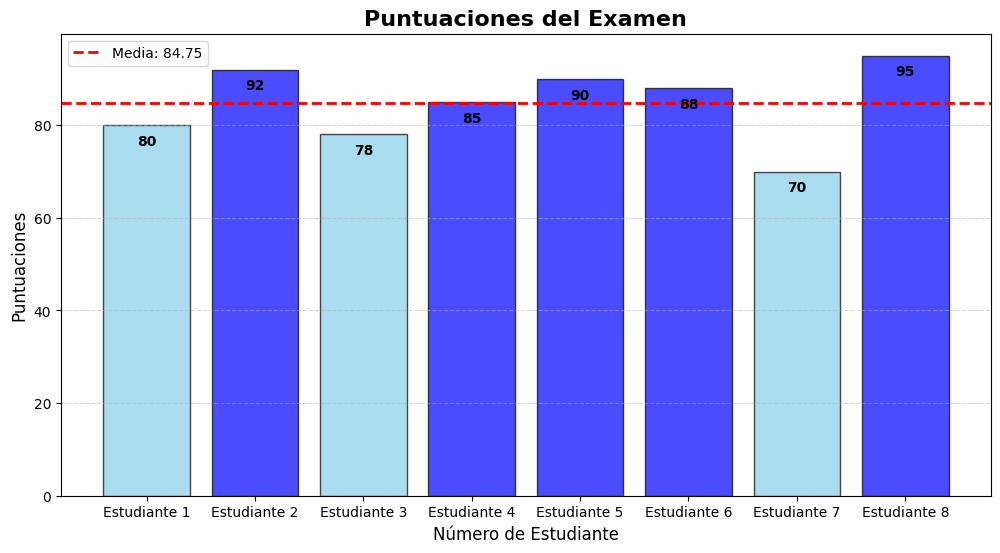

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
puntuaciones = np.array([80, 92, 78, 85, 90, 88, 70, 95])

# Cálculo de la media
media = np.mean(puntuaciones)

# Mostrar la media
print("La media de las puntuaciones es:", media)

# Colores individuales para cada barra
colores = ['blue' if score >= media else 'skyblue' for score in puntuaciones]

# Configuración de la gráfica de barras
plt.figure(figsize=(12, 6))
barras = plt.bar(range(len(puntuaciones)), puntuaciones, color=colores, alpha=0.7, edgecolor='black')

# Línea de la media
plt.axhline(y=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')

# Añadir anotaciones en las barras
for barra, puntuacion in zip(barras, puntuaciones):
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval - 5, round(puntuacion, 1), ha='center', va='bottom', color='black', fontweight='bold')

# Títulos y etiquetas
plt.title('Puntuaciones del Examen', fontsize=16, fontweight='bold')
plt.xlabel('Número de Estudiante', fontsize=12)
plt.ylabel('Puntuaciones', fontsize=12)
plt.xticks(range(len(puntuaciones)), ['Estudiante 1', 'Estudiante 2', 'Estudiante 3', 'Estudiante 4', 'Estudiante 5', 'Estudiante 6', 'Estudiante 7', 'Estudiante 8'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5, which='both', axis='y')  # Añadir una cuadrícula horizontal

# Mostrar la gráfica
plt.show()

Este código realiza los siguientes pasos:

**Importa las bibliotecas necesarias:** Numpy para cálculos numéricos y Matplotlib para visualización.

**Define y calcula la media:** Utiliza `np.mean()` para calcular la media de las puntuaciones.

**Imprime la media:** Muestra el valor de la media calculada.

**Crea una gráfica de barras:** Visualiza cada puntuación como una barra y la media como una línea horizontal roja discontinua.

**Interpretación**

En la gráfica, cada barra representa la puntuación de un estudiante en el examen, y la línea roja discontinua indica la media de todas las puntuaciones. Esta visualización ayuda a ver rápidamente cómo se comparan las puntuaciones individuales con la media del grupo.

Este análisis y visualización proporcionan una comprensión clara de la distribución de las puntuaciones y destacan cuán útil puede ser la media para resumir un conjunto de datos con un solo número. ¿Te gustaría explorar otro aspecto de las estadísticas descriptivas o tienes alguna otra pregunta?

### **12.1.3 Varianza de conjuntos de datos unidimensionales**

**Definición de Varianza**

La **varianza** es una medida de dispersión que describe cuánto se alejan los valores en un conjunto de datos del promedio (media). Es decir, indica qué tan dispersos están los datos alrededor de su media. La varianza es muy útil para entender la variabilidad o el grado de dispersión en los datos.

**Fórmula Matemática**

La varianza se calcula con la siguiente fórmula para una muestra:

$\text{Varianza (s}^2\text{)} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}$

donde $(x_i)$ representa cada valor en el conjunto de datos, $(\overline{x})$ es la media de esos valores, y $(n)$ es el número total de valores en la muestra. El divisor $(n-1)$ se utiliza en lugar de $(n)$ para proporcionar una estimación más precisa de la varianza de la población subyacente (corrección de Bessel).

**Ejemplo**

Imaginemos que tenemos el siguiente conjunto de datos que representa las edades de un grupo de personas:

$\text{Edades} = [22, 26, 20, 34, 28, 32]$

Primero calculamos la media:

$\overline{x} = \frac{22 + 26 + 20 + 34 + 28 + 32}{6} = 27$

Luego, aplicamos la fórmula de la varianza:

$\text{Varianza} = \frac{(22-27)^2 + (26-27)^2 + (20-27)^2 + (34-27)^2 + (28-27)^2 + (32-27)^2}{6-1}$

$\text{Varianza} = \frac{25 + 1 + 49 + 49 + 1 + 25}{5} = 30$

**Código en Python y Gráfica**

Vamos a calcular la varianza usando Python y a visualizar la distribución de los datos y su dispersión alrededor de la media.

Media: 27.0
Varianza: 30.0


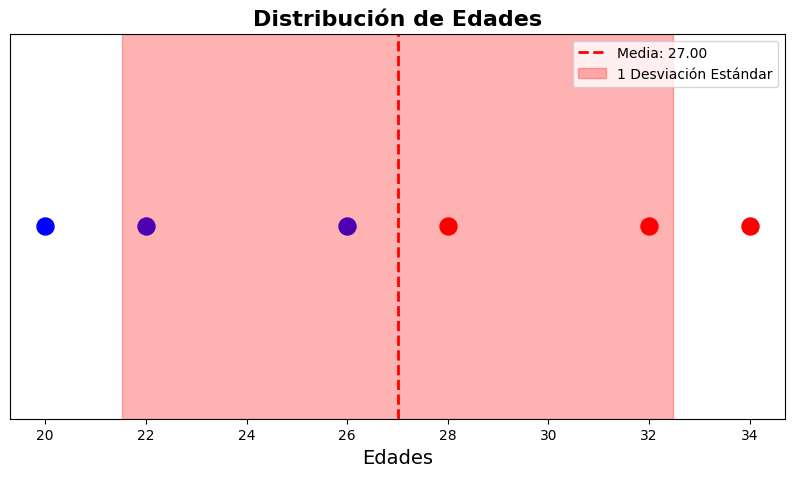

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
edades = np.array([22, 26, 20, 34, 28, 32])

# Cálculo de la media y la varianza
media = np.mean(edades)
varianza = np.var(edades, ddof=1)  # ddof=1 para usar n-1 en el denominador
desviacion_std = np.sqrt(varianza)  # Cálculo de la desviación estándar

# Mostrar la media y la varianza
print("Media:", media)
print("Varianza:", varianza)

# Configuración de la gráfica
plt.figure(figsize=(10, 5))
colores = ['red' if edad >= media else 'blue' for edad in edades]
tamaños = 150  # tamaño uniforme para todos los puntos

# Puntos de dispersión
for edad, color in zip(edades, colores):
    plt.scatter(edad, 0, color=color, s=tamaños)

# Línea de la media y desviación estándar
plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvspan(media - desviacion_std, media + desviacion_std, color='red', alpha=0.3, label='1 Desviación Estándar')

# Mejoras visuales
plt.title('Distribución de Edades', fontsize=16, fontweight='bold')
plt.xlabel('Edades', fontsize=14)
plt.yticks([])  # Eliminar las marcas en el eje Y
plt.legend()
plt.grid(False)  # Eliminar la cuadrícula para un fondo más limpio
plt.show()

**Interpretación**

Este código calcula y muestra la media y la varianza de las edades. Además, grafica cada edad como un punto azul en una línea horizontal, con la media indicada por una línea roja discontinua. Esta visualización ayuda a ver la dispersión de las edades respecto a la media y cuán variable es el grupo de datos.

La varianza de 30 nos indica que, en promedio, cada edad se desvía aproximadamente $(\sqrt{30} \approx 5.48)$ años de la media, lo que nos da una idea de la dispersión de las edades en este conjunto de datos.

La varianza es fundamental en estadística para entender la dispersión y es especialmente útil en comparaciones de variabilidad entre diferentes grupos de datos o en el cálculo de otras estadísticas como la desviación estándar. ¿Hay algún otro concepto estadístico o análisis que te gustaría explorar?

### **12.1.4 Varianza de conjuntos de datos de mayor dimensión**

Cuando hablamos de la varianza de conjuntos de datos de mayor dimensión, estamos tratando con un concepto que se extiende más allá del unidimensional para incluir múltiples variables. Estos datos se pueden analizar de varias maneras, pero una de las más importantes en estadística multivariable es la varianza y la covarianza entre las variables.

**Varianza en Datos Multidimensionales**

En el contexto de datos multidimensionales, cada variable puede tener su propia varianza, y además, podemos calcular la covarianza entre pares de variables. Esto nos ayuda a entender no solo cómo varía cada variable individualmente, sino también cómo se relacionan las variables entre sí.

**Fórmula de la Varianza**

La fórmula de la varianza para una sola variable sigue siendo la misma que en el caso unidimensional:

$\text{Varianza (s}^2\text{)} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}$

donde $(x_i)$ representa cada valor de la variable, $(\overline{x})$ es la media de esos valores, y $(n)$ es el número total de valores.

**Matriz de Covarianza**

Para datos multidimensionales, una herramienta comúnmente utilizada es la **matriz de covarianza**. Si tenemos un conjunto de datos con $(k)$ variables, la matriz de covarianza será de $(k \times k)$, donde el elemento en la i-ésima fila y j-ésima columna es la covarianza entre la i-ésima y la j-ésima variable.

La covarianza entre dos variables $(X)$ e $(Y)$ se calcula como:

$\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}{n-1}$

**Ejemplo Práctico con Código en Python**

Supongamos que tenemos un conjunto de datos que incluye las puntuaciones en matemáticas, lectura y escritura de varios estudiantes.

Media de Matemáticas: 69.16666666666667
Varianza de Matemáticas: 254.16666666666669
Media de Lectura: 70.83333333333333
Varianza de Lectura: 177.76666666666668
Media de Escritura: 69.5
Varianza de Escritura: 216.3

Matriz de Covarianza:
 [[254.16666667 206.83333333 219.5       ]
 [206.83333333 177.76666667 187.7       ]
 [219.5        187.7        216.3       ]]


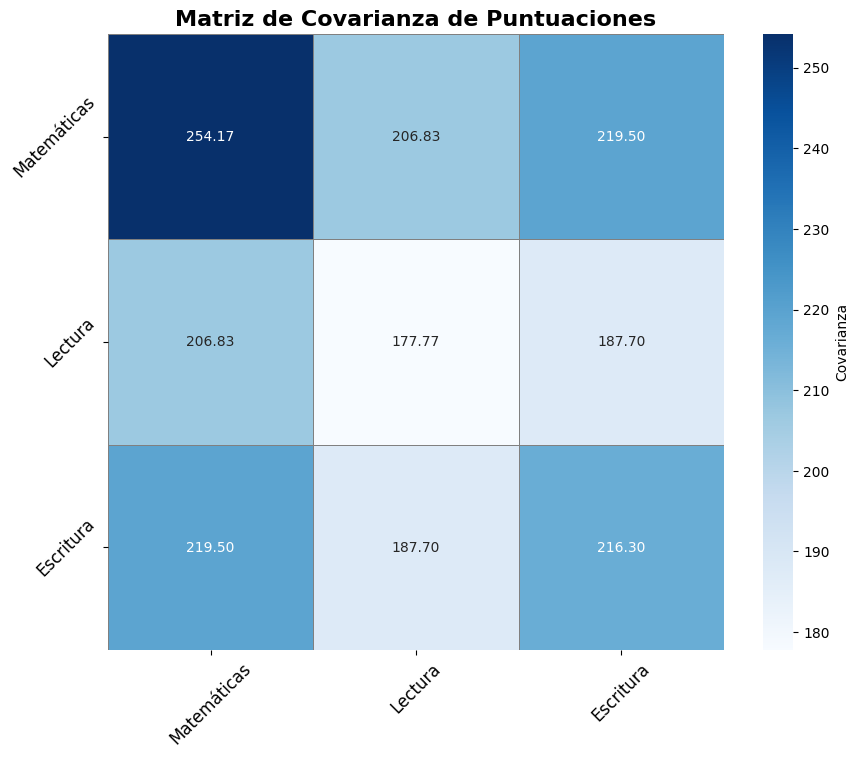

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo: puntuaciones en matemáticas, lectura y escritura
datos = np.array([
    [65, 70, 75],
    [80, 82, 78],
    [75, 70, 72],
    [90, 88, 85],
    [45, 50, 43],
    [60, 65, 64]
])

# Calcular la media y la varianza por variable
media_matematicas = np.mean(datos[:, 0])
varianza_matematicas = np.var(datos[:, 0], ddof=1)
media_lectura = np.mean(datos[:, 1])
varianza_lectura = np.var(datos[:, 1], ddof=1)
media_escritura = np.mean(datos[:, 2])
varianza_escritura = np.var(datos[:, 2], ddof=1)

# Calcular la matriz de covarianza
matriz_covarianza = np.cov(datos, rowvar=False)

# Mostrar los resultados
print("Media de Matemáticas:", media_matematicas)
print("Varianza de Matemáticas:", varianza_matematicas)
print("Media de Lectura:", media_lectura)
print("Varianza de Lectura:", varianza_lectura)
print("Media de Escritura:", media_escritura)
print("Varianza de Escritura:", varianza_escritura)
print("\nMatriz de Covarianza:\n", matriz_covarianza)

# Gráfica de la matriz de covarianza
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_covarianza, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Covarianza'}, xticklabels=['Matemáticas', 'Lectura', 'Escritura'], yticklabels=['Matemáticas', 'Lectura', 'Escritura'], square=True, linewidths=.5, linecolor='gray')
plt.title("Matriz de Covarianza de Puntuaciones", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.show()

**Interpretación**

En este código:

- Calculamos la media y la varianza para cada asignatura (matemáticas, lectura, escritura).
- Calculamos la matriz de covarianza, que muestra no solo la varianza de cada asignatura (en la diagonal) sino también la covarianza entre las asignaturas (en los elementos fuera de la diagonal).
- Visualizamos esta matriz usando un mapa de calor, lo que facilita la interpretación visual de estas relaciones.

Este enfoque multivariable es fundamental en estadística para entender cómo las variables interactúan entre sí, lo cual es crucial en muchos análisis, incluyendo el análisis de componentes principales (PCA), regresiones múltiples, y más.

### **12.1.5 Efecto sobre la media**

Cuando hablamos del **efecto sobre la media**, generalmente nos referimos a cómo ciertos cambios en un conjunto de datos pueden influir en el valor de la media. Estos cambios pueden incluir la adición o eliminación de datos, o la alteración de algunos valores existentes. Es un concepto clave en estadística porque la media es muy sensible a los valores extremos o "outliers".

**Impacto de los Outliers en la Media**

Los outliers son valores en un conjunto de datos que son muy diferentes del resto de los datos. Su presencia puede afectar significativamente la media, ya que puede inclinarla hacia el outlier.

**Ejemplo Ilustrativo**

Imagina un conjunto de datos de los ingresos mensuales en una pequeña empresa:

$\text{Ingresos} = [3000, 3200, 2900, 3100, 3000, 125000]$

El último valor (125000) es claramente un outlier que probablemente representa un error o un caso atípico como el ingreso del CEO.

**Cálculo de la media con y sin el outlier:**

Sin el outlier:

$\text{Media sin outlier} = \frac{3000 + 3200 + 2900 + 3100 + 3000}{5} = 3040$

Con el outlier:

$\text{Media con outlier} = \frac{3000 + 3200 + 2900 + 3100 + 3000 + 125000}{6} \approx 22600$

Como se puede ver, el outlier ha elevado significativamente la media, distorsionando la percepción de los ingresos típicos.

**Fórmulas Matemáticas**

La media se calcula utilizando la fórmula:

$\text{Media} = \frac{\sum_{i=1}^{n} x_i}{n}$

Donde $(x_i)$ es cada valor individual en el conjunto de datos y $(n)$ es el número total de valores.

**Ejemplo en Python y Visualización**

Vamos a calcular la media con y sin un outlier y visualizar cómo afecta a los datos.

Media con outlier: 23366.666666666668
Media sin outlier: 3040.0


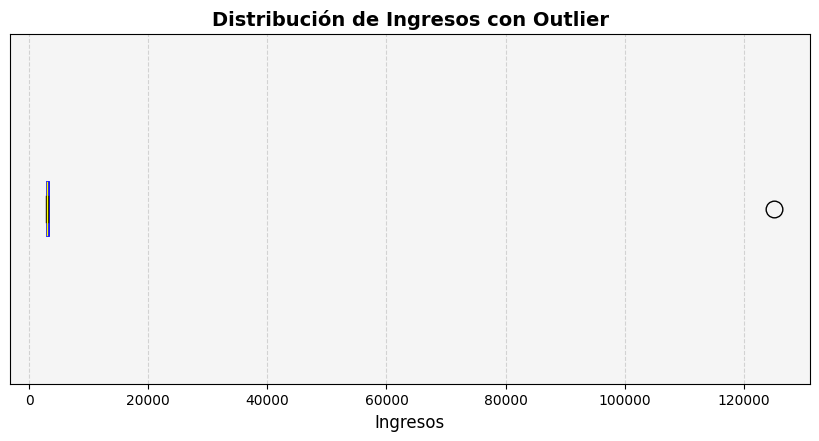

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
ingresos = np.array([3000, 3200, 2900, 3100, 3000, 125000])

# Cálculo de la media con y sin el outlier
media_con_outlier = np.mean(ingresos)
media_sin_outlier = np.mean(ingresos[:-1])  # Excluyendo el último valor

# Mostrar las medias
print("Media con outlier:", media_con_outlier)
print("Media sin outlier:", media_sin_outlier)

# Gráfica para visualizar el efecto del outlier
plt.figure(figsize=(10, 5))
bplot = plt.boxplot(ingresos, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=12))

# Personalización de colores y estilos
plt.setp(bplot['boxes'], color='blue', linewidth=2, facecolor='lightblue')
plt.setp(bplot['whiskers'], color='green', linestyle='--')
plt.setp(bplot['caps'], color='black')
plt.setp(bplot['medians'], color='yellow')

# Añadir título y etiquetas
plt.title('Distribución de Ingresos con Outlier', fontsize=14, fontweight='bold')
plt.xlabel('Ingresos', fontsize=12)
plt.yticks([])  # Eliminar etiquetas del eje Y para limpiar visualmente

# Añadir una cuadrícula y mejorar la visualización
plt.grid(True, linestyle='--', alpha=0.5, which='both', axis='x')
plt.gca().set_facecolor('whitesmoke')  # Cambiar el color de fondo del gráfico
plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)  # Ajustar márgenes

# Mostrar el gráfico
plt.show()

**Interpretación**

En este código:
- Calculamos y comparamos la media con y sin un outlier.
- Visualizamos los ingresos usando un diagrama de caja (boxplot), donde los outliers se destacan en rojo.

El diagrama de caja muestra claramente cómo un valor extremo puede afectar la distribución general de los datos, haciendo que la media sea un indicador menos confiable de la tendencia central en presencia de outliers.

**Conclusión**

Este ejemplo muestra que la media es altamente sensible a outliers, lo que puede tener un impacto significativo en la interpretación de los datos. Esto es especialmente importante en campos como la economía, la sociología, y la ciencia de datos, donde entender y manejar adecuadamente los outliers es crucial para obtener análisis precisos.

### **12.1.6 Efecto sobre la (co)varianza**

El efecto sobre la (co)varianza se refiere a cómo cambios en un conjunto de datos afectan la varianza y la covarianza de dicho conjunto. Estas medidas de dispersión y relación entre variables pueden verse influidas por la adición o eliminación de datos, así como por la presencia de valores atípicos o outliers.

**Varianza y Covarianza: Conceptos Básicos**

**Varianza**: Mide qué tan dispersos están los datos en relación con la media. Una varianza alta indica que los datos están muy dispersos, mientras que una baja varianza indica que están más agrupados cerca de la media.

**Covarianza**: Mide cómo dos variables cambian juntas, pero su magnitud es difícil de interpretar porque depende de las unidades de medida de las variables. Una covarianza positiva indica que ambas variables tienden a aumentar o disminuir juntas, mientras que una negativa indica que cuando una variable aumenta, la otra disminuye.

**Fórmulas Matemáticas**

**Varianza**:

$\text{Varianza (s}^2\text{)} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}$

**Covarianza**:

$\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}{n-1}$

**Ejemplo: Efecto de un Outlier**

Supongamos que tenemos dos variables, $(X)$ y $(Y)$, cada una con cinco observaciones. Observemos cómo un outlier afecta la varianza y la covarianza.

**Sin outlier**:

$X = [2, 3, 2, 4, 5], \quad Y = [1, 5, 3, 4, 2]$

**Con outlier**:

$X = [2, 3, 2, 4, 50], \quad Y = [1, 5, 3, 4, 50]$

**Código en Python y Gráfica**

Vamos a calcular y visualizar cómo el outlier afecta la varianza y la covarianza utilizando Python.

Varianza de X sin outlier: 1.7
Varianza de Y sin outlier: 2.5
Covarianza entre X y Y sin outlier: 0.25
Varianza de X con outlier: 447.19999999999993
Varianza de Y con outlier: 439.3
Covarianza entre X y Y con outlier: 442.59999999999997


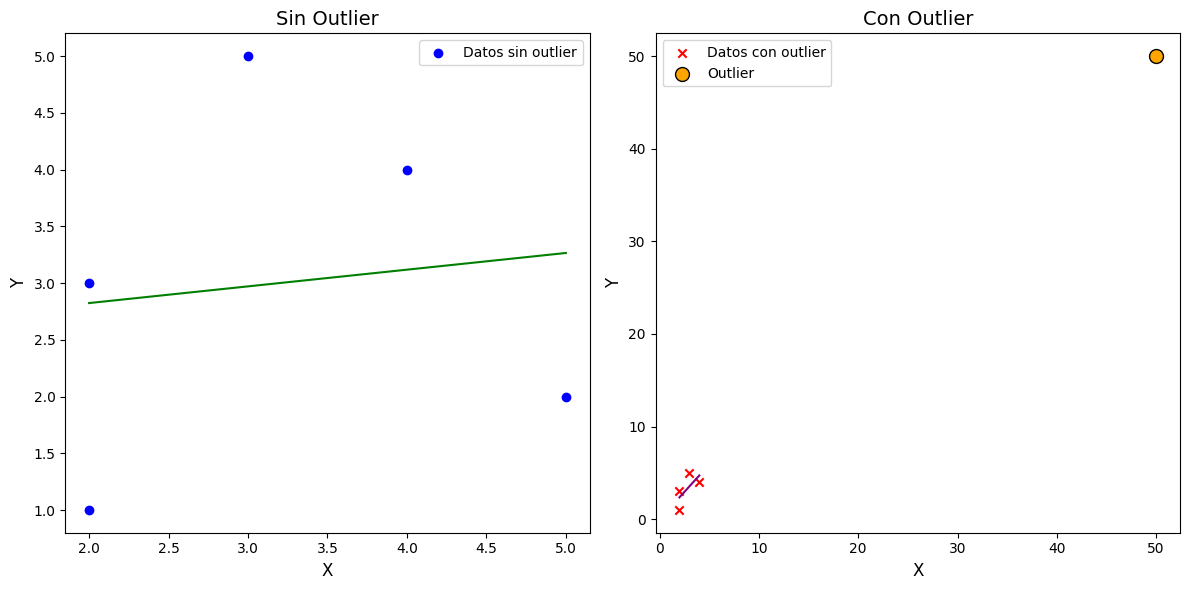

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
X = np.array([2, 3, 2, 4, 5])
Y = np.array([1, 5, 3, 4, 2])
X_outlier = np.array([2, 3, 2, 4, 50])
Y_outlier = np.array([1, 5, 3, 4, 50])

# Cálculos de varianza y covarianza sin y con outlier
varianza_X = np.var(X, ddof=1)
varianza_Y = np.var(Y, ddof=1)
covarianza_XY = np.cov(X, Y, ddof=1)[0, 1]

varianza_X_outlier = np.var(X_outlier, ddof=1)
varianza_Y_outlier = np.var(Y_outlier, ddof=1)
covarianza_XY_outlier = np.cov(X_outlier, Y_outlier, ddof=1)[0, 1]

# Impresión de resultados
print("Varianza de X sin outlier:", varianza_X)
print("Varianza de Y sin outlier:", varianza_Y)
print("Covarianza entre X y Y sin outlier:", covarianza_XY)
print("Varianza de X con outlier:", varianza_X_outlier)
print("Varianza de Y con outlier:", varianza_Y_outlier)
print("Covarianza entre X y Y con outlier:", covarianza_XY_outlier)

# Gráfica de dispersión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', marker='o', label='Datos sin outlier')
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='green')
plt.title("Sin Outlier", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_outlier, Y_outlier, color='red', marker='x', label='Datos con outlier')
plt.plot(np.unique(X_outlier[:-1]), np.poly1d(np.polyfit(X_outlier[:-1], Y_outlier[:-1], 1))(np.unique(X_outlier[:-1])), color='purple')
plt.scatter(X_outlier[-1], Y_outlier[-1], color='orange', s=100, edgecolors='black', label='Outlier')
plt.title("Con Outlier", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

**Interpretación**

- **Varianza**: La varianza de $(X)$ y $(Y)$ aumenta dramáticamente con la inclusión del outlier. Esto indica una mayor dispersión debido al valor extremo.

- **Covarianza**: La covarianza

 también aumenta, indicando que la relación lineal percibida entre $(X)$ y $(Y)$ se intensifica con el outlier, aunque este cambio puede no reflejar una relación verdadera.

**Conclusión**

La inclusión de outliers tiene un impacto significativo en la varianza y la covarianza. En la práctica, es esencial evaluar y, si es necesario, corregir la presencia de outliers para obtener una imagen precisa de la relación entre las variables y la dispersión de los datos. Estos ejemplos muestran la importancia de la gestión adecuada de datos y las técnicas de análisis en estadística.

### **12.1.7 Matrices simétricas, definidas positivas**

Las **matrices simétricas definidas positivas** son un concepto fundamental en álgebra lineal y tienen aplicaciones importantes en áreas como optimización, teoría de control, estadística y más. A continuación, te proporciono una explicación detallada con ejemplos, gráficas, fórmulas matemáticas y código Python.

**Matrices Simétricas**

Una matriz simétrica es una matriz cuadrada que es igual a su transpuesta. Esto significa que el elemento en la i-ésima fila y j-ésima columna es igual al elemento en la j-ésima fila y i-ésima columna.

**Fórmula Matemática**:

Si $(A)$ es una matriz de tamaño $(n \times n)$, entonces $(A)$ es simétrica si:

$A = A^T$

donde $(A^T)$ es la transpuesta de $(A)$.

**Ejemplo**:

$A = \begin{bmatrix}
1 & 7 & 3 \\
7 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}$

Para que $(A)$ sea simétrica, $(A)$ debe ser igual a $(A^T)$, que también es:

$A^T = \begin{bmatrix}
1 & 7 & 3 \\
7 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}$

**Matrices Definidas Positivas**

Una matriz $(A)$ es definida positiva si para cualquier vector no cero $(x)$, el producto cuadrático $(x^T A x)$ es siempre positivo. Esto es una propiedad crucial para muchas aplicaciones en análisis numérico y optimización, porque asegura que la función cuadrática asociada tiene un único mínimo global.

**Fórmula Matemática**:

$x^T A x > 0, \quad \forall x \neq 0$

**Ejemplo**:

Considere la matriz:

$A = \begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 2
\end{bmatrix}$

Vamos a verificar si es definida positiva calculando $(x^T A x)$ para un vector arbitrario $(x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})$.

**Código en Python**

Vamos a verificar la simetría y si la matriz es definida positiva utilizando Python.

In [7]:
import numpy as np

# Definir la matriz
A = np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])

# Comprobar si A es simétrica
def es_simetrica(A):
    return np.allclose(A, A.T)

# Verificar si la matriz es definida positiva
def es_definida_positiva(A):
    try:
        np.linalg.cholesky(A)
        return True
    except np.linalg.LinAlgError:
        return False

# Mostrar resultados
print("A es simétrica:", es_simetrica(A))
print("A es definida positiva:", es_definida_positiva(A))

A es simétrica: True
A es definida positiva: True


**Interpretación**

- **Simetría**: El código verifica si la matriz es exactamente igual a su transpuesta, lo cual es cierto para nuestra matriz $(A)$.

- **Definida Positiva**: Utilizamos la descomposición de Cholesky, que es un método eficiente para verificar si una matriz simétrica es definida positiva. Si la descomposición falla, entonces la matriz no es definida positiva.

**Conclusión**

Las matrices simétricas definidas positivas son esenciales en muchas áreas de la matemática aplicada y la ingeniería. Entender estas propiedades y saber cómo verificarlas es crucial para el diseño de algoritmos y modelos que requieren estabilidad y optimización.

### **12.1.8 Varianza de los conjuntos de datos 1D**

La **varianza** es una medida estadística que describe la dispersión de los datos en un conjunto. Es fundamental para entender cuánto se alejan los valores del promedio (media) de un conjunto de datos. La varianza es especialmente útil en estadística descriptiva, probabilidad, y en muchos otros campos que involucran el análisis de datos.

**Concepto de Varianza**

La varianza mide el promedio de los cuadrados de las desviaciones de cada dato respecto a la media del conjunto. Cuanto mayor es la varianza, más dispersos están los datos; una varianza pequeña indica que los datos tienden a estar más cerca de la media.

**Fórmula Matemática**

La fórmula para calcular la varianza en un conjunto de datos es:

$\text{Varianza} (s^2) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n-1}$

Donde:

- $(x_i)$ representa cada dato en el conjunto.

- $(\overline{x})$ es la media de los datos.

- $(n)$ es el número total de datos.

- $(n-1)$ actúa como divisor en el caso de una muestra para dar una estimación no sesgada (esto es conocido como corrección de Bessel).

**Ejemplo Práctico**

Supongamos que tenemos el siguiente conjunto de datos, que representa las edades de un grupo de personas:

$\text{Edades} = [22, 25, 29, 28, 22, 25, 27, 24]$

**Cálculo de la Media**

Primero, calculamos la media de las edades:

$\overline{x} = \frac{22 + 25 + 29 + 28 + 22 + 25 + 27 + 24}{8} = 25.25$

**Cálculo de la Varianza**

Luego, usamos la fórmula de la varianza para calcular la dispersión de las edades:

$s^2 = \frac{(22-25.25)^2 + (25-25.25)^2 + (29-25.25)^2 + (28-25.25)^2 + (22-25.25)^2 + (25-25.25)^2 + (27-25.25)^2 + (24-25.25)^2}{8-1}$

$s^2 = \frac{10.5625 + 0.0625 + 14.0625 + 7.5625 + 10.5625 + 0.0625 + 3.0625 + 1.5625}{7} = 5.42$

**Código en Python y Gráfica**

Vamos a calcular y visualizar la varianza usando Python, y crear un histograma para ver la distribución de los datos.

Media de las edades: 25.25
Varianza de las edades: 6.785714285714286


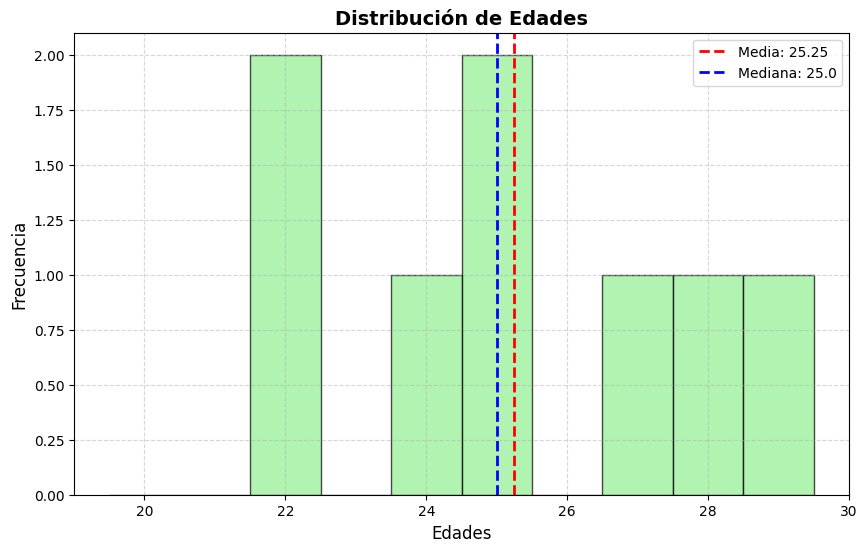

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
edades = np.array([22, 25, 29, 28, 22, 25, 27, 24])

# Cálculo de la media y la varianza
media = np.mean(edades)
varianza = np.var(edades, ddof=1)
mediana = np.median(edades)  # Cálculo de la mediana

# Mostrar resultados
print("Media de las edades:", media)
print("Varianza de las edades:", varianza)

# Configuración del estilo del histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
bins = np.arange(20, 31) - 0.5
plt.hist(edades, bins=bins, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media}')
plt.axvline(mediana, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana}')

# Añadir título y etiquetas mejoradas
plt.title('Distribución de Edades', fontsize=14, fontweight='bold')
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir leyenda
plt.legend()

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.5, which='both')

# Mostrar el gráfico
plt.show()

**Interpretación**

- El histograma muestra cómo se distribuyen las edades, con una línea roja indicando la media.
- La varianza calculada muestra que hay una dispersión moderada de las edades alrededor de la media.

El cálculo y visualización de la varianza proporcionan información crucial sobre la variabilidad de los datos, lo que es importante para muchos análisis estadísticos, como determinar la fiabilidad de las medias o comparar las dispersiones entre varios conjuntos de datos.

### **12.1.9 Media de los conjuntos de datos**

La **media** de un conjunto de datos, comúnmente conocida como el promedio, es una medida de tendencia central que se usa para describir el valor típico de un conjunto de números. Es probablemente el resumen estadístico más comúnmente utilizado debido a su simplicidad y claridad conceptual.

**Concepto de la Media**

La media aritmética se calcula sumando todos los valores en un conjunto de datos y luego dividiendo esa suma por la cantidad de valores. Matemáticamente, se expresa como:

$\text{Media} = \overline{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

donde $(x_i)$ representa cada valor individual en el conjunto de datos y $(n)$ es el número total de valores.

**Ejemplo Práctico**

Supongamos que queremos calcular la media de las temperaturas en grados Celsius registradas durante una semana:

$\text{Temperaturas} = [20, 22, 21, 19, 17, 23, 24]$

Primero, sumamos todas las temperaturas:

$\text{Suma de temperaturas} = 20 + 22 + 21 + 19 + 17 + 23 + 24 = 146$

El número de observaciones $(n)$ es 7. Luego, calculamos la media:

$\text{Media} = \frac{146}{7} \approx 20.86 \text{°C}$

**Código en Python y Gráfica**

Podemos calcular y visualizar esta media utilizando Python. Además, crearemos un diagrama de barras para representar las temperaturas y la media.

Media de las temperaturas: 20.857142857142858


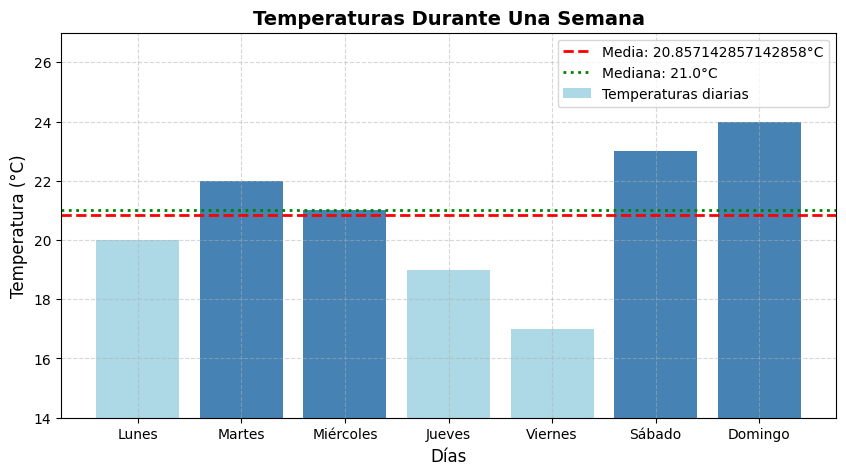

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
temperaturas = np.array([20, 22, 21, 19, 17, 23, 24])

# Cálculo de la media y la mediana
media = np.mean(temperaturas)
mediana = np.median(temperaturas)

# Mostrar la media
print("Media de las temperaturas:", media)

# Configuración del gráfico
plt.figure(figsize=(10, 5))
colores = ['lightblue' if temp < media else 'steelblue' for temp in temperaturas]
plt.bar(range(len(temperaturas)), temperaturas, color=colores, label='Temperaturas diarias')

# Líneas para la media y la mediana
plt.axhline(y=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media}°C')
plt.axhline(y=mediana, color='green', linestyle=':', linewidth=2, label=f'Mediana: {mediana}°C')

# Añadir título y etiquetas mejoradas
plt.title('Temperaturas Durante Una Semana', fontsize=14, fontweight='bold')
plt.xlabel('Días', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(range(len(temperaturas)), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Añadir leyenda
plt.legend()

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.5, which='both')

# Ajustar los límites del eje Y
plt.ylim([min(temperaturas) - 3, max(temperaturas) + 3])

# Mostrar el gráfico
plt.show()

**Interpretación**

En este código:

- Calculamos la media de las temperaturas utilizando la función `np.mean()` de la biblioteca NumPy.
- Mostramos la media y luego la representamos en un gráfico de barras como una línea roja discontinua que atraviesa las barras de temperatura. Esto visualiza claramente cómo se compara cada temperatura diaria con la media semanal.

**Importancia de la Media**

La media es útil porque ofrece una visión simple y rápida del "centro" de un conjunto de datos. Sin embargo, es importante tener en cuenta que la media puede ser engañosa si los datos están sesgados o contienen outliers significativos, ya que estos extremos pueden afectar desproporcionadamente la media.

Por ejemplo, en el caso de ingresos o precios de vivienda, un pequeño número de valores extremadamente altos puede hacer que la media parezca más alta de lo que realmente representa la mayoría de los datos. En estos casos, otras medidas como la mediana pueden ser más informativas.

La media es fundamental en estadísticas y se usa ampliamente en todo tipo de análisis de datos, desde la investigación científica hasta la economía y más allá.

### **12.1.10 Matriz de covarianza de un conjunto de datos bidimensional**

La **matriz de covarianza** es una herramienta estadística esencial en el análisis de datos multidimensionales, especialmente cuando se desea entender la relación y la variabilidad conjunta entre varias variables. En el contexto de un conjunto de datos bidimensional, esta matriz proporciona una descripción compacta de cómo cada par de variables en el conjunto varía conjuntamente.

**Definición de la Matriz de Covarianza**

Para un conjunto de datos con $(k)$ variables, la matriz de covarianza es una matriz $(k \times k)$, donde el elemento en la i-ésima fila y j-ésima columna representa la covarianza entre la i-ésima y la j-ésima variable. La covarianza es una medida que indica el grado al que dos variables cambian en conjunto. Un valor positivo indica que ambas variables tienden a aumentar o disminuir juntas, mientras que un valor negativo sugiere que una variable aumenta cuando la otra disminuye.

**Fórmula Matemática**

La covarianza entre dos variables $(X)$ e $(Y)$ con $(n)$ observaciones se calcula como:

$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})$

donde $(\overline{X})$ y $(\overline{Y})$ son las medias de las variables $(X)$ e $(Y)$, respectivamente.

Para una matriz de covarianza de un conjunto bidimensional $(X)$ y $(Y)$:

$\text{Cov}(X, Y) = \begin{bmatrix}
\text{Var}(X) & \text{Cov}(X,Y) \\
\text{Cov}(Y,X) & \text{Var}(Y)
\end{bmatrix}$

**Ejemplo Práctico**

Supongamos que tenemos un conjunto de datos con mediciones de la altura y el peso de cinco personas:

$X = \text{Altura (cm)} = [160, 170, 175, 180, 185]$

$Y = \text{Peso (kg)} = [65, 68, 77, 83, 88]$

**Cálculo de la Matriz de Covarianza**

Calculamos la matriz de covarianza para estos datos.

**Código en Python y Gráfica**

Vamos a calcular la matriz de covarianza con Python y visualizar la relación entre altura y peso.

Matriz de Covarianza:
 [[92.5  90.25]
 [90.25 94.7 ]]


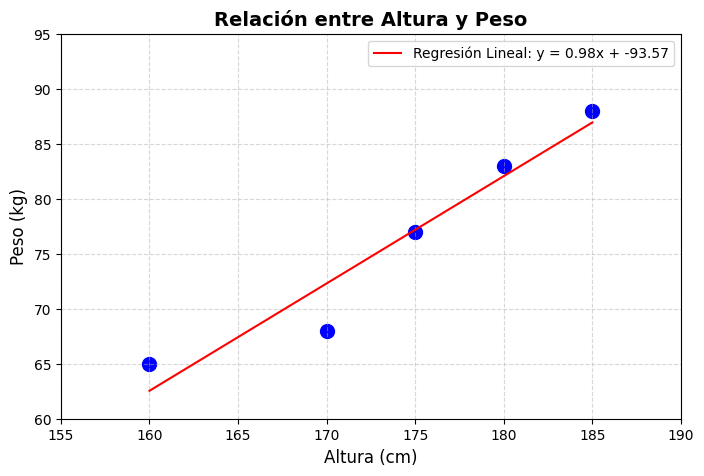

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
altura = np.array([160, 170, 175, 180, 185])
peso = np.array([65, 68, 77, 83, 88])

# Organizar los datos en una matriz de 2 columnas
datos = np.vstack([altura, peso])

# Calcular la matriz de covarianza
matriz_covarianza = np.cov(datos)

# Imprimir la matriz de covarianza
print("Matriz de Covarianza:\n", matriz_covarianza)

# Gráfica de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(altura, peso, color='blue', marker='o', s=100)  # Cambiar tamaño y forma del marcador

# Añadir una línea de regresión
m, b = np.polyfit(altura, peso, 1)
plt.plot(altura, m*altura + b, color='red', label=f'Regresión Lineal: y = {m:.2f}x + {b:.2f}')

# Mejoras visuales
plt.title('Relación entre Altura y Peso', fontsize=14, fontweight='bold')
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Ajustar los límites de los ejes
plt.xlim([155, 190])
plt.ylim([60, 95])

# Mostrar el gráfico
plt.show()

**Interpretación**

- La matriz de covarianza impresa mostrará los valores de varianza en la diagonal (varianza de altura y varianza de peso) y la covarianza entre altura y peso fuera de la diagonal.
- La gráfica de dispersión ayuda a visualizar cómo a medida que aumenta la altura, el peso también tiende a aumentar, lo que sugiere una relación positiva que debería reflejarse en un valor positivo de covarianza.

La matriz de covarianza es crucial en estadísticas para entender la dependencia entre variables. Es ampliamente utilizada en análisis exploratorio de datos, modelado estadístico, reducción de dimensionalidad (como en Análisis de Componentes Principales) y más.

Esta explicación y el ejemplo proporcionado deberían ayudarte a entender cómo calcular y interpretar una matriz de covarianza para datos bidimensionales.

### **12.1.11 Media/covarianza de un conjunto de datos + efecto de una transformación lineal**

La **media** y la **covarianza** son conceptos centrales en estadística que describen las propiedades de un conjunto de datos. Cuando se aplica una transformación lineal a estos datos, tanto la media como la covarianza se ven afectadas de maneras específicas y predecibles. Esto es crucial en muchas aplicaciones de análisis de datos y modelado estadístico, como en el Análisis de Componentes Principales (PCA) y en la normalización de datos.

**Media y Covarianza de un Conjunto de Datos**

**Media**: Como mencioné antes, es el promedio de los datos, calculado como:

$\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$

donde $(x_i)$ son los valores del conjunto de datos y $(n)$ es el número de observaciones.

**Covarianza**: Mide cómo dos variables varían juntas. Para dos variables $(X)$ e $(Y)$, la covarianza se calcula como:

$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})$

Para un conjunto de datos multidimensional, se puede representar en forma de una matriz de covarianza.

**Efecto de una Transformación Lineal**

Cuando aplicamos una transformación lineal a un conjunto de datos, la nueva media y covarianza se pueden calcular a partir de la transformación y las propiedades originales de los datos.

Si $(Z = AX + b)$ es una transformación lineal, donde:

- $(A)$ es una matriz de transformación.

- $(X)$ es el vector de datos original.

- $(b)$ es un vector de términos constantes (traslación).

las nuevas propiedades se calculan como:

**Nueva media**:

$\overline{Z} = A\overline{X} + b$

**Nueva covarianza**:

$\text{Cov}(Z) = A \text{ Cov}(X) A^T$

Estas fórmulas son clave para entender cómo las transformaciones lineales afectan los datos, como en el caso del escalado, rotación o traslación de los mismos.

**Ejemplo con Python**

Supongamos un conjunto de datos con 2 variables y aplicamos una transformación lineal. Visualizaremos el efecto de esta transformación.

**Datos y Transformación Lineal**

Consideremos dos variables $(X_1)$ y $(X_2)$ con una correlación. Aplicaremos una transformación lineal que rota y escala estos datos.

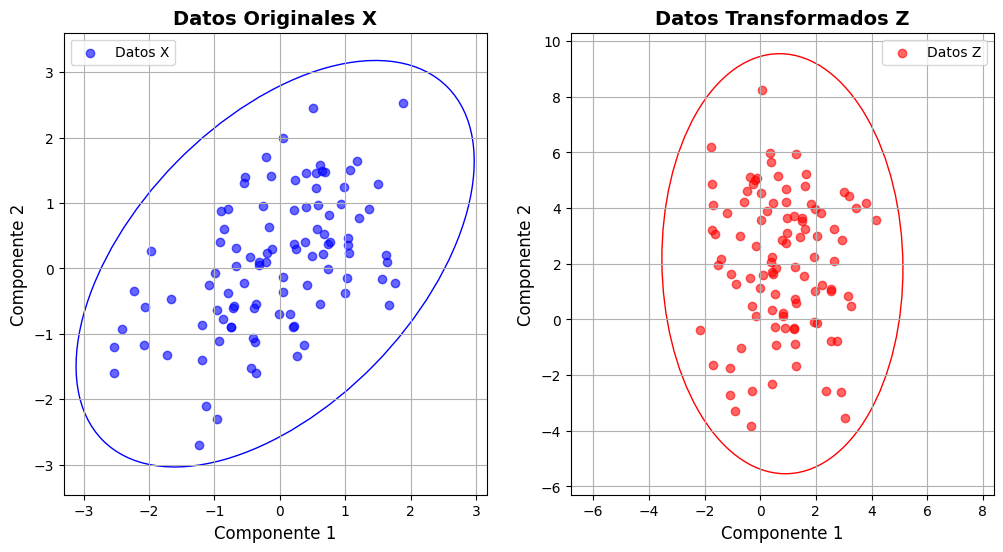

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Crea una elipse de confianza de n_std para los datos en x y y sobre el 'ax' dado.
    """
    if x.size != y.size:
        raise ValueError("x y y deben ser del mismo tamaño")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Generar datos
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100)

# Matriz de transformación A (rotar 45 grados y escalar)
theta = np.pi / 4  # 45 grados
scale = 2  # Factor de escala
A = scale * np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
b = np.array([1, 2])  # Traslación

# Aplicar transformación
Z = (A @ X.T).T + b

# Gráficas
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, color='blue', label='Datos X')
confidence_ellipse(X[:, 0], X[:, 1], ax1, edgecolor='blue')
plt.title("Datos Originales X", fontsize=14, fontweight='bold')
plt.xlabel("Componente 1", fontsize=12)
plt.ylabel("Componente 2", fontsize=12)
plt.grid(True)
plt.axis('equal')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.6, color='red', label='Datos Z')
confidence_ellipse(Z[:, 0], Z[:, 1], ax2, edgecolor='red')
plt.title("Datos Transformados Z", fontsize=14, fontweight='bold')
plt.xlabel("Componente 1", fontsize=12)
plt.ylabel("Componente 2", fontsize=12)
plt.grid(True)
plt.axis('equal')
plt.legend()

plt.show()

**Interpretación**

- Las gráficas muestran cómo los datos originales se distribuyen antes y después de la transformación. La transformación afecta la orientación, tamaño y posición de la distribución de los datos.

- Los cálculos muestran que la nueva media y la nueva covarianza de $(Z)$ se han ajustado según las fórmulas previas, reflejando los efectos de la matriz $(A)$ y el vector $(b)$.

Este tipo de análisis es útil para preparar datos para algoritmos de aprendizaje automático, optimizar funciones en análisis cuantitativo y muchas otras aplicaciones en ciencia de datos y estadística.

### **12.1.12 Media/covarianza de un conjunto de datos + efecto de una transformación lineal**

Entender cómo una transformación lineal afecta la media y la covarianza de un conjunto de datos es fundamental en muchos campos, como en el aprendizaje automático, análisis de datos y optimización. Veamos esto con más detalle.

**Media y Covarianza de un Conjunto de Datos**

**Media**: Es el promedio de los datos. Para un conjunto de datos $(X)$ con $(n)$ observaciones y $(k)$ dimensiones, la media $(\overline{X})$ es un vector donde cada elemento es el promedio de una columna de $(X)$.

$\overline{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$

**Covarianza**: Describe cómo dos variables en el conjunto de datos varían juntas. La matriz de covarianza para $(k)$ variables es una matriz $(k \times k)$ donde cada elemento $(i, j)$ es la covarianza entre las variables $(i)$ y $(j)$.

$\text{Cov}(X_i, X_j) = \frac{1}{n-1} \sum_{m=1}^n (X_{m,i} - \overline{X}_i)(X_{m,j} - \overline{X}_j)$

**Efecto de una Transformación Lineal**

Consideremos una transformación lineal $(Z = AX + b)$, donde:

- $(A)$ es una matriz de transformación de $(k \times k)$.

- $(b)$ es un vector de traslación de $(k)$ dimensiones.

Las nuevas propiedades estadísticas transformadas son:

**Nueva Media**:

$\overline{Z} = A\overline{X} + b$

**Nueva Matriz de Covarianza**:

$\text{Cov}(Z) = A \text{ Cov}(X) A^T$

Estas ecuaciones muestran que la transformación lineal $(A)$ cambia la escala y orientación de los datos, mientras que el vector $(b)$ los traslada.

**Ejemplo Práctico y Código en Python**

Vamos a crear un ejemplo con datos bidimensionales y aplicaremos una transformación lineal para ver cómo cambian la media y la covarianza.

**Datos Originales**

Supongamos un conjunto de datos $(X)$ en dos dimensiones distribuidos normalmente.

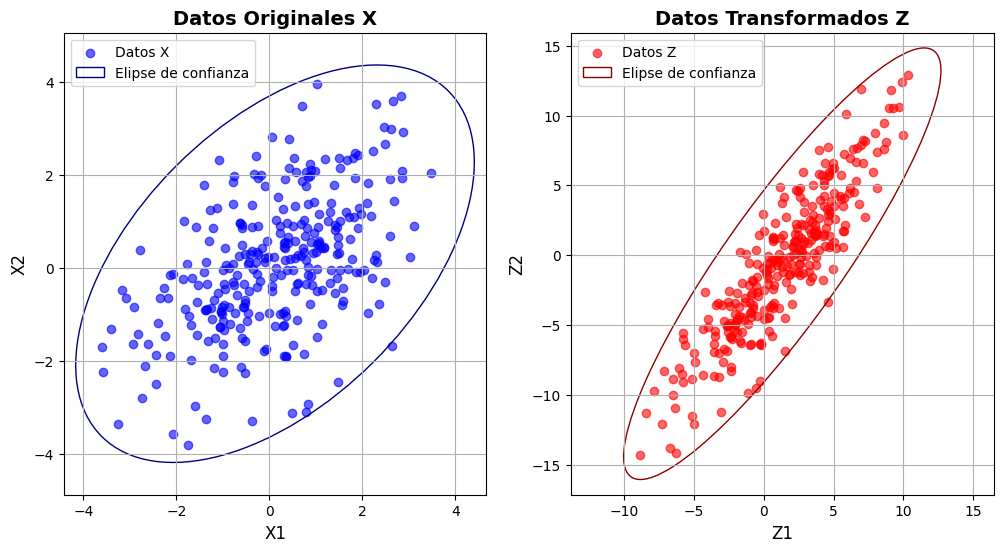

Media original de X: [0.12195147 0.08739298]
Covarianza original de X:
 [[2.04037018 1.0409808 ]
 [1.0409808  2.02896441]]
Media transformada de Z: [ 1.33129592 -0.6158696 ]
Covarianza transformada de Z:
 [[14.35436833 17.45449918]
 [17.45449918 26.54693469]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Crea una elipse de confianza de n_std para los datos en x y y sobre el 'ax' dado.
    """
    if x.size != y.size:
        raise ValueError("x y y deben ser del mismo tamaño")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Generar datos aleatorios
np.random.seed(0)
X = np.random.multivariate_normal(mean=[0, 0], cov=[[2, 1], [1, 2]], size=300)

# Calcular la media y la covarianza de los datos originales
mean_X = np.mean(X, axis=0)
cov_X = np.cov(X, rowvar=False)

# Definir una matriz de transformación A y un vector b
A = np.array([[2, 1], [1, 3]])
b = np.array([1, -1])

# Aplicar la transformación lineal
Z = X.dot(A.T) + b

# Calcular la media y la covarianza de los datos transformados
mean_Z = np.mean(Z, axis=0)
cov_Z = np.cov(Z, rowvar=False)

# Visualización de los datos antes y después de la transformación
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.6, label='Datos X')
confidence_ellipse(X[:, 0], X[:, 1], ax1, edgecolor='navy', label='Elipse de confianza')
plt.title("Datos Originales X", fontsize=14, fontweight='bold')
plt.xlabel("X1", fontsize=12)
plt.ylabel("X2", fontsize=12)
plt.grid(True)
plt.legend()
plt.axis('equal')

ax2 = plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], color='red', alpha=0.6, label='Datos Z')
confidence_ellipse(Z[:, 0], Z[:, 1], ax2, edgecolor='darkred', label='Elipse de confianza')
plt.title("Datos Transformados Z", fontsize=14, fontweight='bold')
plt.xlabel("Z1", fontsize=12)
plt.ylabel("Z2", fontsize=12)
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.show()

# Imprimir las medias y covarianzas
print("Media original de X:", mean_X)
print("Covarianza original de X:\n", cov_X)
print("Media transformada de Z:", mean_Z)
print("Covarianza transformada de Z:\n", cov_Z)

**Interpretación**

- **Gráficos**: Los puntos azules representan el conjunto de datos original $(X)$, y los puntos rojos, el conjunto transformado $(Z)$. Notarás que $(Z)$ no sólo ha cambiado de posición debido a $(b)$ sino también de forma y orientación debido a $(A)$.

- **Salida del Código**:

Las medias y covarianzas calculadas confirman las fórmulas. La media se ha trasladado y la matriz de covarianza ha cambiado según la transformación $(A)$.

| **Inicio** | **atrás 11** | **Siguiente 13** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./11_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./13_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|